Загрузка необходимых данных. 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import  numpy as np
users = pd.read_csv("data/users_df.csv")
items = pd.read_csv("data/items_df.csv")

train_data = pd.read_csv("data/train_data.csv")

<h1>Анализ данных пользователей</h1>

<code>user_id</code> - id пользователя

<code>age_category</code> - Возрастная категория

<code>income</code> - доход

<code>sex</code> - пол

<code>kids_flg</code> - наличие детей

<code>education</code> - образование


count     180418
unique         5
top        25-34
freq       69235
Name: age_category, dtype: object
age_category
25-34    69235
18-24    55685
35-44    43550
NaN      26959
45-54    10910
55-70     1038
Name: count, dtype: int64
Количество пропущенных значений: 26959


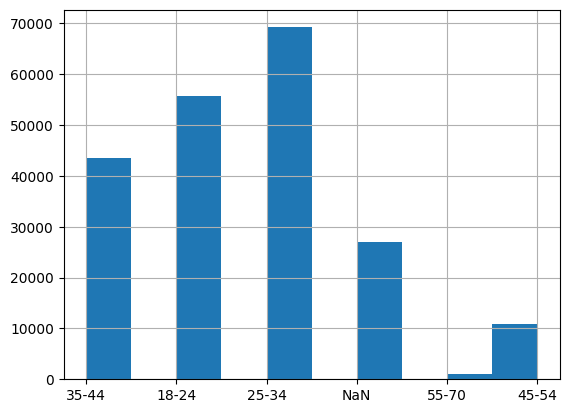

In [2]:
print(users["age_category"].describe())
print(users["age_category"].value_counts(dropna=False))

print("Количество пропущенных значений:",users["age_category"].isna().sum())

users["age_category"].replace(np.nan,"NaN").hist()
plt.show()
#print(users)

Больше всегда пользователей имеют возраст от 25 до 34 лет. Доля пропущенных данных состовляет около 15%. Доля пропущенных значений довольно велика, и мы не можем просто удалить эти записи, целесообразней пропущенные значения выделить в отдельную категорию.

count      136235
unique          4
top       средний
freq        56686
Name: income, dtype: object
income
NaN              71142
средний          56686
низкий           54721
высокий          21578
очень высокий     3250
Name: count, dtype: int64
Количество пропущенных значений: 71142
Распределение пользователей по доходу.


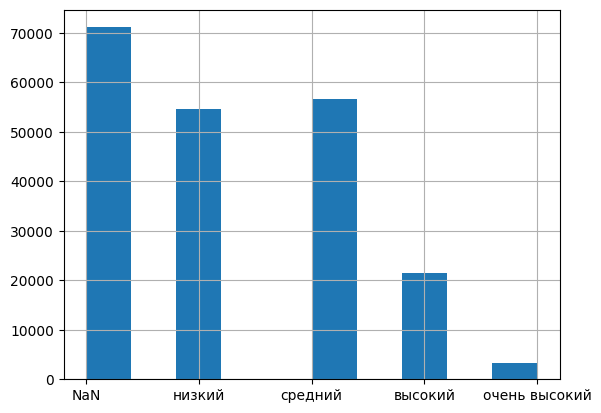

In [3]:
print(users["income"].describe())
print(users["income"].value_counts(dropna=False))

print("Количество пропущенных значений:",users["income"].isna().sum())

print("Распределение пользователей по доходу.")
users["income"].replace(np.nan,"NaN").hist()
plt.show()

Больше чем у половины пользователей отсутствует информация о доходе. Можно считать, что все пользователи, у которых пропущено значение, имеют средний доход, также можно вовсе отбросить этот признак.

count      132623
unique          2
top       Женский
freq        67723
Name: sex, dtype: object
sex
NaN        74754
Женский    67723
Мужской    64900
Name: count, dtype: int64
Количество пропущенных значений: 74754
Распределение пользователей по полу.


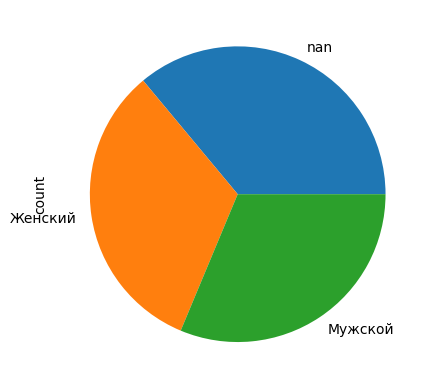

In [4]:
print(users["sex"].describe())
print(users["sex"].value_counts(dropna=False))

print("Количество пропущенных значений:",users["sex"].isna().sum())

print("Распределение пользователей по полу.")
users["sex"].value_counts(dropna=False).plot.pie()
plt.show()

У трети пользователей не указан пол, но это важный признак, которой невозможно отбросить. Все пропущенные значения будут выделены в отдельную категорию.

count    186639.000000
mean          0.338927
std           0.473346
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: kids_flg, dtype: float64
kids_flg
0.0    123382
1.0     63257
NaN     20738
Name: count, dtype: int64
Количество пропущенных значений: 20738
Распределение пользователей по наличию детей.


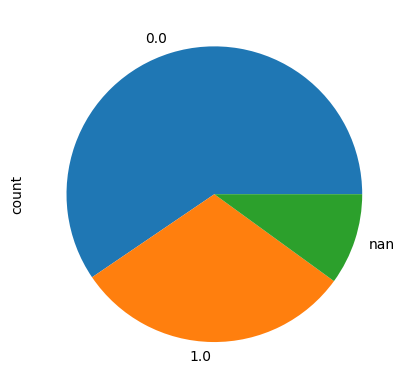

In [5]:
print(users["kids_flg"].describe())
print(users["kids_flg"].value_counts(dropna=False))

print("Количество пропущенных значений:",users["kids_flg"].isna().sum())

print("Распределение пользователей по наличию детей.")
users["kids_flg"].value_counts(dropna=False).plot.pie()
plt.show()

У большинства пользователей нет детей, целесообразно заменить пропущенные значения на 0.

count      176270
unique          4
top       Среднее
freq        70253
Name: education, dtype: object
education
Среднее            70253
Высшее             52970
Неполное высшее    44141
NaN                31107
Без образования     8906
Name: count, dtype: int64
Количество пропущенных значений: 31107


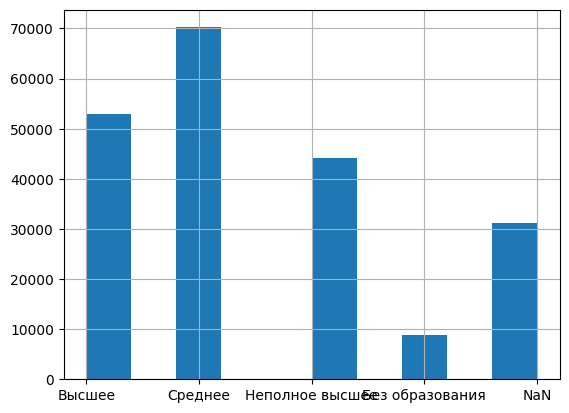

In [6]:
print(users["education"].describe())
print(users["education"].value_counts(dropna=False))

print("Количество пропущенных значений:",users["education"].isna().sum())

users["education"].replace(np.nan,"NaN").hist()
plt.show()
#print(users)

У 17% пользователей неизвестно образование, для обработки пропущенных значений их можно вынести в отдельную категорию.

<h1>Анализ данных о фильмах</h1>

<code>id</code> - id фильма

<code>title</code> - название фильма

<code>year</code> - год создания

<code>date_publication</code> - дата публикации

<code>description</code> - описание фильма

<code>genres</code> - жанры 

<code>countries</code> - страна создания

<code>staff</code> - режиссер, продюссеры и актеры

<code>title_orig</code> - оригинальное название

<code>age_rating</code> - возрастной рейтинг

<code>keywords</code> - ключевые слова

<h2>Дата выпуска</h2>

count    7427.000000
mean     2008.498048
std        16.401058
min      1895.000000
25%      2005.000000
50%      2014.000000
75%      2019.000000
max      2025.000000
Name: year, dtype: float64
year
2021    628
2018    571
2022    450
2019    418
2020    413
       ... 
1900      1
1927      1
1946      1
1945      1
1937      1
Name: count, Length: 99, dtype: int64
Количество пропущенных значений: 0


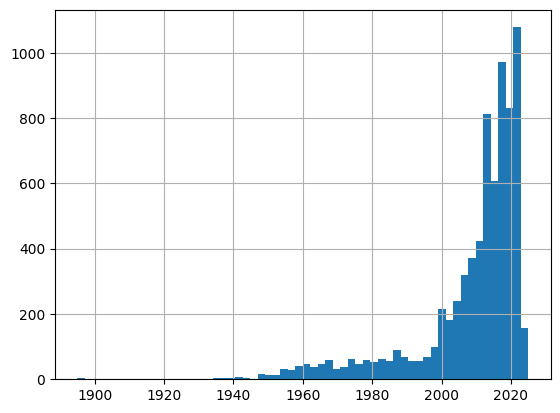

In [7]:
items["year"] = pd.to_datetime(items["year"]).dt.year

print(items["year"].describe())
print(items["year"].value_counts(dropna=False))

print("Количество пропущенных значений:",items["year"].isna().sum())

items["year"].hist(bins = 60)
plt.show()

Распределение фильмов по годам представляет собой половину нормального распределения, и скорее всего наиболее надежным вариантом будет являться разделить эти фильмы на категории по десятилетиям (60е, 70е, 80е и т.д.), но в качестве эксперимента я попробую преобразовать распределение, используя логарифм.

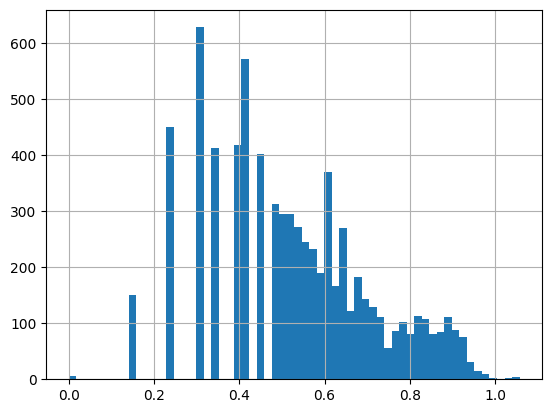

In [8]:
items = items[items.year != 2025] # Удаляем фильмы, которые еще не вышли
items["year"] -= 2025
items["year"] = np.abs(items["year"])
items["year"] = np.emath.logn(100,items["year"])

items["year"].hist(bins = 60)
plt.show()

Таким образом, фильмы, которые вышли недавно, сжимаются в представлении значительно слабее, чем те фильмы, которые вышли после 2000х годов. Это может помочь модели лучше различать вкусы пользователей, ведь субъективно, разница между фильмами, вышедших в 2010x и 2020x, больше, чем разница между фильмами 1960x и 1970x годов.

<h2>Дата публикации</h2>

In [9]:
print(items["date_publication"].describe())
print("Количество пропущенных значений:",items["date_publication"].isna().sum())


count                    4923
unique                    576
top       2023-01-12T00:00:00
freq                      628
Name: date_publication, dtype: object
Количество пропущенных значений: 2502


Дата публикации фильма является малоинформативным для определений вкусов пользователя, и то, что половина значений пропущена, позволяет нам без раздумий не использовать этот признак в нашем модели.

Анализ описания фильма может потребовать от нас использования языковой модели BERT. Возможность использования рассматривается...

<h2>Жанры</h2>

In [10]:
items["genres"] = items["genres"].apply(lambda x: eval(x))

genres = pd.read_csv("data/genres.csv")
genre_exp = items.explode("genres")
genre_counts = genre_exp["genres"].value_counts()

merged = genres.set_index("id").join(genre_counts).sort_values("count",ascending=False)
merged = merged[merged["count"] >=10]

print(merged.head(10))

               name  count
id                        
97            Драма   1990
46          Комедия   1565
85            Фильм   1023
303         Триллер    928
294          Боевик    825
138       Мелодрама    775
158     Приключения    667
326           Ужасы    450
266      Фантастика    423
198  Документальный    396


Наиболее популярным жанром является драма и комедия. Из всех жанров стоит оставить только те, у которых есть хотя бы 10 фильмов.

<h2>Персонал</h2>

In [11]:
items["staff"] = items["staff"].apply(lambda x: eval(x))

staff = pd.read_csv("data/staff.csv")
staff_exp = items.explode("staff")
staff_counts = staff_exp["staff"].value_counts()

merged = staff.set_index("id").join(staff_counts).sort_values("count",ascending=False)

print("Общее количество:",len(merged))
u = merged[merged["count"] > 5]
print("Количество тех, кто участвовал в более чем 5 фильмах:",len(u))

Общее количество: 35684
Количество тех, кто участвовал в более чем 5 фильмах: 1947


У абсолютное большинство актерского состава снялось в менее чем 5 фильмах, поэтому врятли пользовательские вкусы будут связаны с одним из этих людей. И остается около двух тысяч актеров и режиссеров, которые могут иметь влияние на предпочтения зрителей.

<h2>Страны</h2>

In [12]:
items["countries"] = items["countries"].apply(lambda x: eval(x))

countries = pd.read_csv("data/countries.csv")
countries_exp = items.explode("countries")
countries_counts = countries_exp["countries"].value_counts()

merged = countries.set_index("id").join(countries_counts).sort_values("count",ascending=False)
merged = merged[merged["count"] >=10]
print(merged.head(10))

               name  count
id                        
102             США   3336
238          Россия   1842
122  Великобритания    772
205            СССР    722
0           Франция    642
188        Германия    425
121          Канада    343
175         Бельгия    157
117           Китай    148
104       Австралия    145


У 42 стран количество произведённых фильмов больше 10. Их и оставим

<h2>Возрастной рейтинг</h2>

count     7425
unique       7
top        nan
freq      4109
Name: age_rating, dtype: object
age_rating
nan     4109
16.0    1373
12.0     733
18.0     693
6.0      319
0.0      189
21.0       9
Name: count, dtype: int64
Количество пропущенных значений: 0


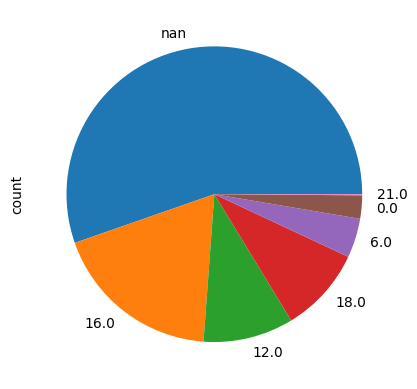

In [13]:
items["age_rating"] = items["age_rating"].apply(lambda x: str(x))
print(items["age_rating"].describe())
print(items["age_rating"].value_counts(dropna=False))

print("Количество пропущенных значений:",items["age_rating"].isna().sum())

items["age_rating"].value_counts(dropna=False).plot.pie()
plt.show()

Этот признак содержить больше половины пропущенных значений, пропущенные значений можно выделить в отдельный класс, но также этот признак можно просто отбросить.

<h2>Ключевые слова</h2>

In [14]:
print(len(items["keywords"]))
print("Количество пропущенных значений:",items["keywords"].isna().sum())

7425
Количество пропущенных значений: 4120


Больше половины значений являются пропущенными, но информация о ключевых словах является очень важной, при анализе вкусов пользователей. Можно заметить, что у всех фильмов, у которых пропущены ключевые слова, отсутствует и возрастной рейтинг.

In [15]:
items["keywords"] = items["keywords"].replace(np.nan,"NaN").apply(lambda x: x.split(",")).apply(lambda x: [i.strip().lower() for i in x])

keywords_exp = items.explode("keywords")
keywords_counts = keywords_exp["keywords"].value_counts()

print("Количество ключевых слов:",len(keywords_counts))
print("Количество ключевых слов, умопянутых больше 10 раз:",len(keywords_counts[keywords_counts >10]))

Количество ключевых слов: 21153
Количество ключевых слов, умопянутых больше 10 раз: 2305


Информативными ключевыми словами являются те, которые встречаются в фильмах больше 10 раз, таким образом, примерно две тысячи ключевых слов будут являться признаками.

<h1>Анализ событий</h1>

<code>id</code> - id просмотра

<code>datetime</code> - дата события

<code>user_id</code> - id фильма

<code>movie_id</code> - id фильма

<code>duration</code> - длительность просмотра (в секундах)

count    1.251871e+06
mean     2.796361e+03
std      2.736542e+03
min      1.000000e+00
25%      2.010000e+02
50%      1.862000e+03
75%      5.181000e+03
max      4.573800e+04
Name: duration, dtype: float64


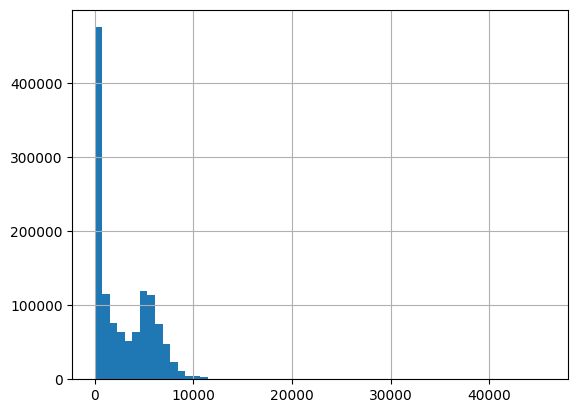

In [16]:
print(train_data["duration"].describe())


train_data["duration"].hist(bins = 60)
plt.show()

Некоторые пользователи просматривали фильм меньше 1 минут, а некоторые - больше 24 часов (возможно они поставили фильм на паузу и уехали). Те, события, где пользователь просмотрел фильм меньше 1 минуты можно исключить, т.к это не даст информации ни о положительной, ни о отрицательной оценке фильма зрителем. Если бы у нас была информация о длительности фильмах, то можно было бы высчитать процент фильма, который пользователь просмотрел, но поскольку у нас таких данных нет, то переведем данные в шкалу, где 0 это просмотр фильма одну минуту, а 1 - просмотр фильма больше 2 часов.

count    987801.000000
mean          0.477466
std           0.336733
min           0.016806
25%           0.135694
50%           0.480972
75%           0.775556
max           1.000000
Name: duration, dtype: float64


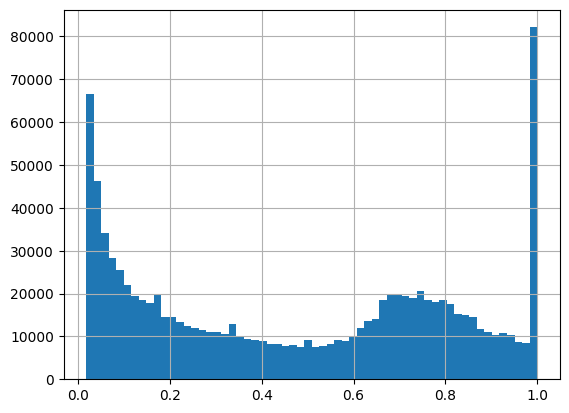

In [17]:
train_data = train_data[120 < train_data["duration"]]

train_data["duration"][train_data["duration"] > 7200] = 7200
train_data["duration"]/=7200
print(train_data["duration"].describe())


train_data["duration"].hist(bins = 60)
plt.show()